In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
a link to a cvs file: "https://drive.google.com/file/d/1sOGTaUJeK-8ECd74xK37D8iqfXAUAkJn/view?usp=drive_link"
filename: 'data.csv'

In [117]:
data = pd.read_csv('data.csv')
data.head()

month  miles
0  Jan-1964  7.269
1  Feb-1964  6.775
2  Mar-1964  7.819
3  Apr-1964  8.371
4  May-1964  9.069

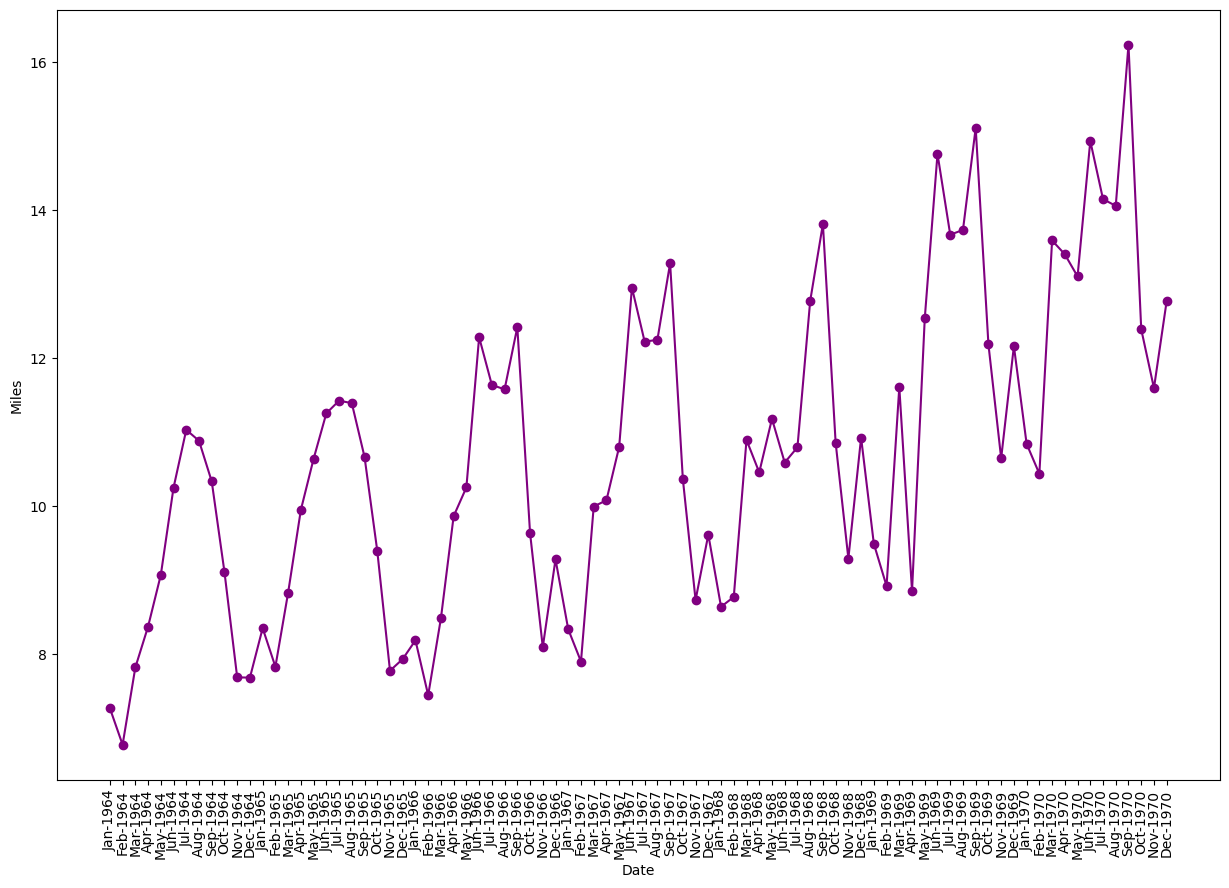

In [77]:
#creating a time series plot to visualize data
fig = plt.figure(figsize=(15, 10))
plt.scatter(data['month'], data['miles'], color = 'purple')
plt.plot(data['month'], data['miles'], '-', color = 'purple')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.xticks(rotation=90) 
plt.show()

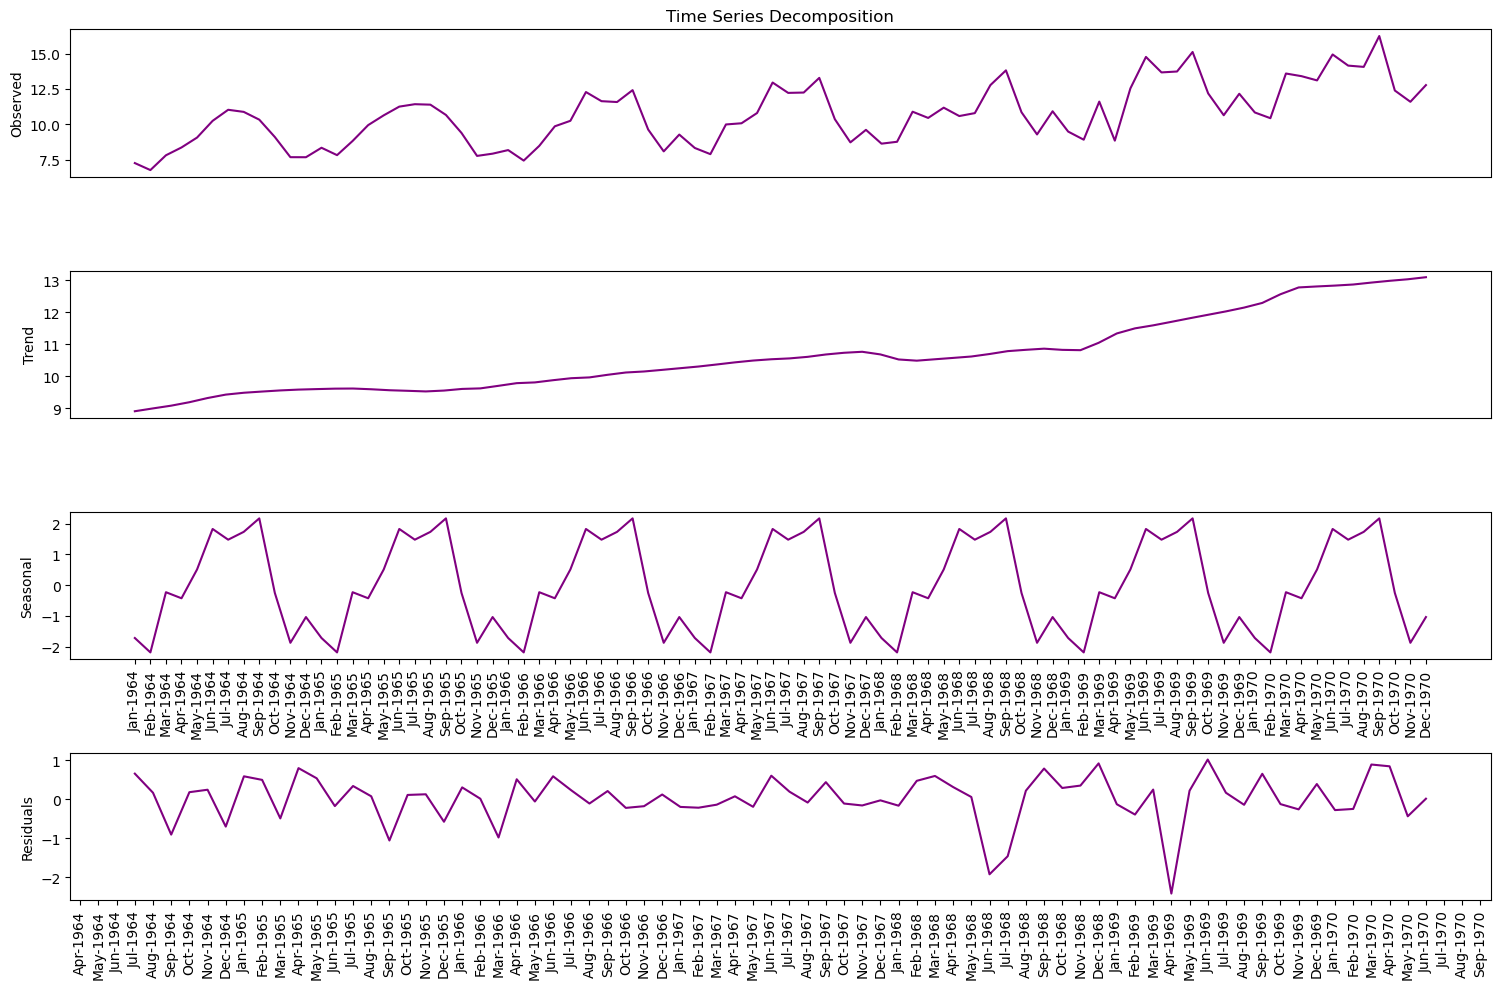

In [92]:
#Decomposing the time series into three components (trend, seasonal and residuals). 
#Presenting the decomposition together with the observed data in the same figure.
data.set_index('month', inplace=True)
period = 12  #specifying the period
decomposition = seasonal_decompose(data['miles'], model='additive', period = period)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid
data.reset_index(inplace=True)

plt.figure(figsize=(15,10))
#Observed
plt.subplot(411)
plt.plot(data['miles'], color = 'purple')
plt.ylabel('Observed')
plt.title('Time Series Decomposition')
plt.xticks([], [])

#Trend
plt.subplot(412)
plt.plot(trend, color = 'purple')
plt.ylabel('Trend')
plt.xticks([], [])

#Seasonal
plt.subplot(413)
plt.plot(seasonal, color = 'purple')
plt.ylabel('Seasonal')
plt.xticks(rotation = 90)

#Residual 
plt.subplot(414)
plt.plot(residuals, color = 'purple')
plt.ylabel('Residuals')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

As we can see from the built graph, the seasonal pattern is pretty obvious: the value tend to increase up to summer season (its top value is mostly june/july), then there is a slight up-down trend during august and september and then the value decreases.
Based on the trend graph we can see that the overall trend of the value throughout the years is increasing.
And by looking at a residuals we can mark that there are some outliers which may not be described by seasonal pattern.

In [96]:
#Dividing the data into a train set and a test set.
train = data[:-12]
test = data[-12:]

In [112]:
#Implementing the four baseline models: historical mean, last yearâ€™s mean, last known value and naive seasonal forecast
#Historical mean
historical_mean = np.mean(train['miles'])
test.loc[:, 'pred_mean'] = historical_mean
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_hist_mean = mape(test['miles'], test['pred_mean'])
print('Historical mean error:', mape_hist_mean) 

#Last year mean
last_year_mean = np.mean(train.miles[-12:])
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
mape_last_year_mean = mape(test['miles'], test['pred__last_yr_mean'])
print("Last year mean error:", mape_last_year_mean)

#Last known value:
last = train.miles.iloc[-1]
test.loc[:, 'pred_last'] = last
mape_last = mape(test['miles'], test['pred_last'])
print('Last known value error:', mape_last) 

#Naive seasonal:
test.loc[:, 'pred_last_season'] = train['miles'][-12:].values
mape_naive_seasonal = mape(test['miles'], test['pred_last_season'])
print("Naive seasonal error: ", mape_naive_seasonal) 


Historical mean error: 20.495527176753704
Last year mean error: 12.128403135253778
Last known value error: 11.530530448364614
Naive seasonal error:  9.021065576009015


As we can see from the results we got, Naive seasonal method gives us the smallest error, which makes this method the most effective. Not far from this result we got the errors of Last known value and Last year mean methods (the difference between them is about 1.4%), which is also not really far from the Naive seasonal method. And the biggest error was resulted by Historical mean method. 